In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
custom_palette = sns.color_palette(['#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8'])

# Figure 3ab

In [3]:
def viz_pathway_embs(pathway_embs, background_embs, color='g'):
    # draw backgournd
    plt.scatter(
        background_embs[:, 0],
        background_embs[:, 1],
        c='gray',
        alpha=0.25,
        s=32,
    )
    # draw metabolties
    plt.scatter(
        pathway_embs[:, 0],
        pathway_embs[:, 1],
        c=color,
        alpha=0.5,
        s=128,
    )
    # draw path
    plt.plot(
        pathway_embs[:, 0], 
        pathway_embs[:, 1], 
        c=color, 
        lw=4, 
        alpha=0.5,
    )
    plt.xticks([], [])
    plt.yticks([], [])
    # zone in to the path
    xmin, xmax = np.min(pathway_embs[:, 0]), np.max(pathway_embs[:, 0])
    ymin, ymax = np.min(pathway_embs[:, 1]), np.max(pathway_embs[:, 1])
    scale = 0.25
    plt.ylim(ymin - (ymax - ymin) * scale, ymax + (ymax - ymin) * scale)
    plt.xlim(xmin - (xmax - xmin) * scale, xmax + (xmax - xmin) * scale)

In [4]:
with open('./data/valid_odorous_metabolite_descriptors.npy', 'rb') as f:
    descriptor_dict = np.load(f, allow_pickle=True).item()
full_metabolite_id = list(descriptor_dict.keys())
all_pom_pca = np.array([descriptor_dict[v]['POM_PCA'] for v in full_metabolite_id])
all_cfp_pca = np.array([descriptor_dict[v]['cFP_PCA'] for v in full_metabolite_id])

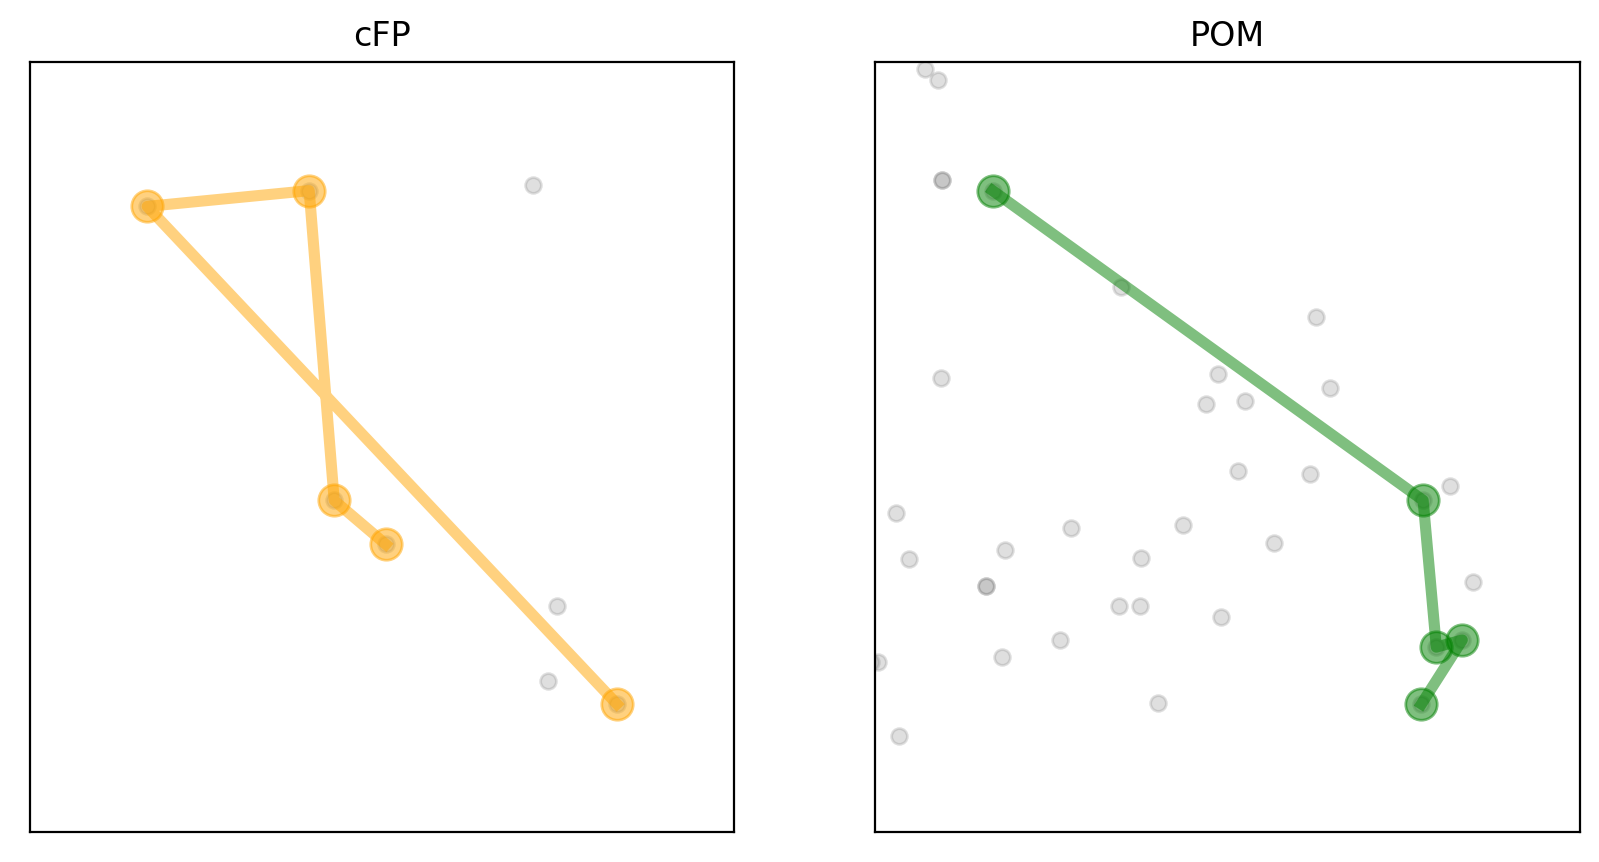

In [5]:
viz_path = ['INDOLE', 'CPD-6361', 'CPD-6362', 'CPD-6364', 'CPD-6365']
path_pom_pca = np.array([descriptor_dict[v]['POM_PCA'] for v in viz_path])
path_cfp_pca = np.array([descriptor_dict[v]['cFP_PCA'] for v in viz_path])
    
plt.figure(figsize=(10, 5), dpi=200)
plt.subplot(1, 2, 1)
viz_pathway_embs(path_cfp_pca, all_cfp_pca, color='orange')
plt.title('cFP')
plt.subplot(1, 2, 2)
viz_pathway_embs(path_pom_pca, all_pom_pca)
plt.title('POM')
plt.show()

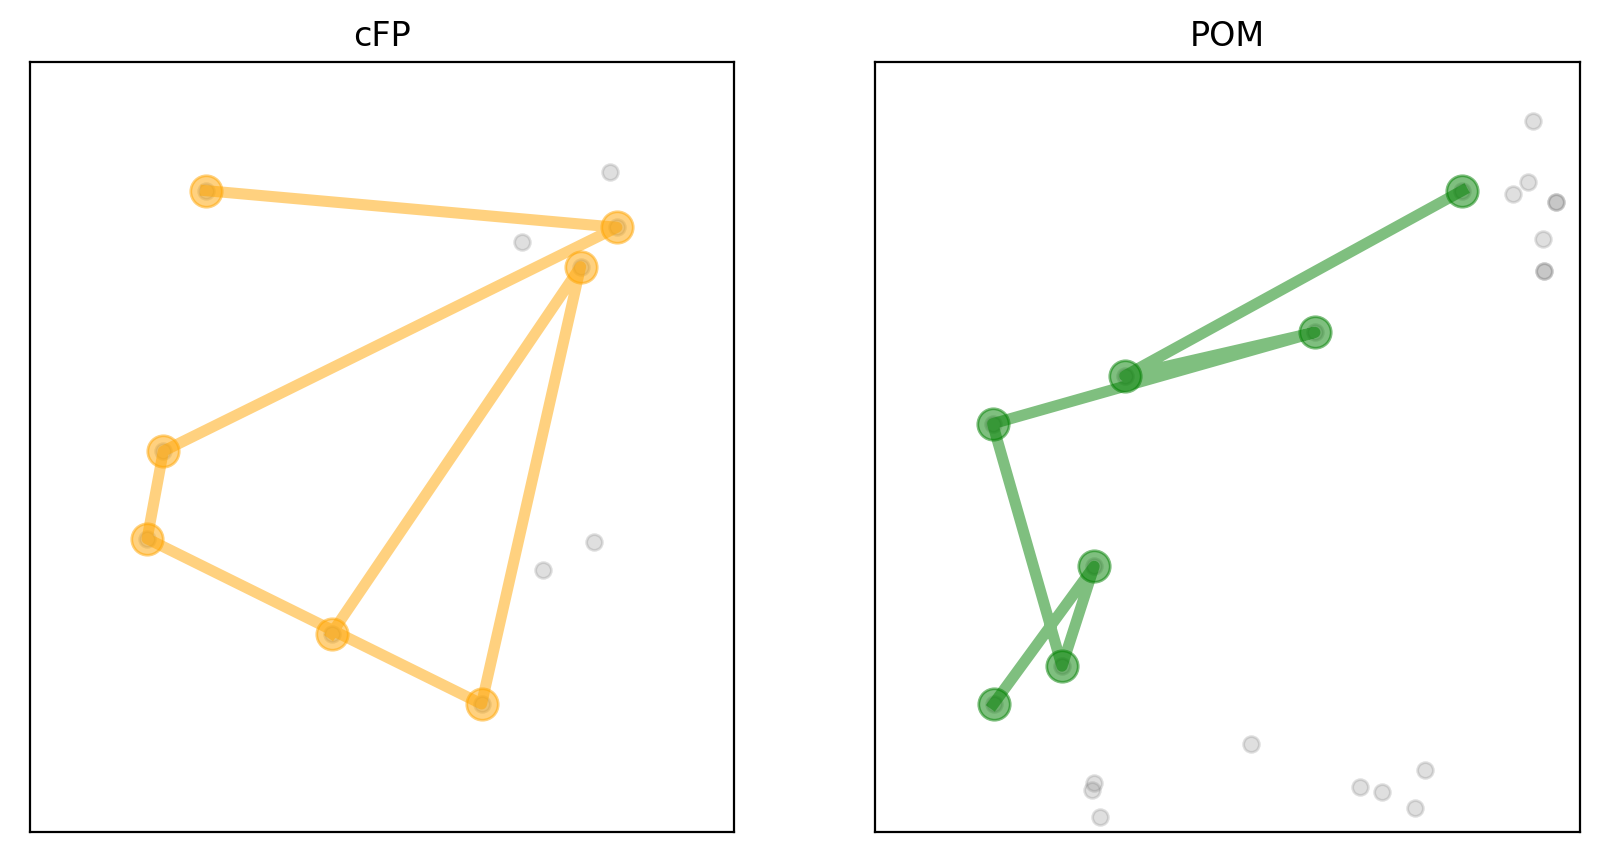

In [6]:
viz_path = ['CPD1F-128', 'ENT-KAUR-16-EN-19-OL', 'ENT-KAUR-16-EN-19-AL', 'CPD1F-132', 'CPD1F-136', 'CPD1F-138', 'CPD1F-95']
path_pom_pca = np.array([descriptor_dict[v]['POM_PCA'] for v in viz_path])
path_cfp_pca = np.array([descriptor_dict[v]['cFP_PCA'] for v in viz_path])
    
plt.figure(figsize=(10, 5), dpi=200)
plt.subplot(1, 2, 1)
viz_pathway_embs(path_cfp_pca, all_cfp_pca, color='orange')
plt.title('cFP')
plt.subplot(1, 2, 2)
viz_pathway_embs(path_pom_pca, all_pom_pca)
plt.title('POM')
plt.show()

# Figure 3d

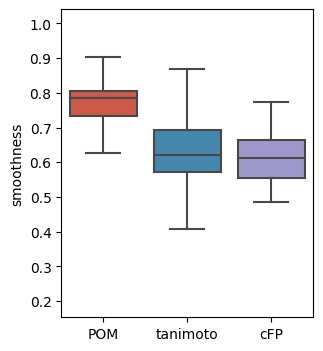

In [7]:
smoothness_df = pd.read_csv('./data/triplet_smoothness.csv')
viz_df = smoothness_df.melt(value_vars=['POM', 'cFP', 'tanimoto'], var_name='descriptor', value_name='smoothness')
plt.figure(figsize=(3.25, 4), dpi=100)
sns.boxplot(
    data=viz_df, 
    x='descriptor', 
    y='smoothness', 
    order=['POM', 'tanimoto', 'cFP'], 
    palette=custom_palette,
    fliersize=0,
)
plt.xlabel('')
plt.show()